# Formants

In [1]:
import numpy as np
from scipy import signal
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap


In [2]:
plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
frequency, wave = wavfile.read("A_440_piano.wav")

In [4]:
frequency

16000

In [5]:
wave

array([-64, -68, -62, ..., 228, 127,  33], dtype=int16)

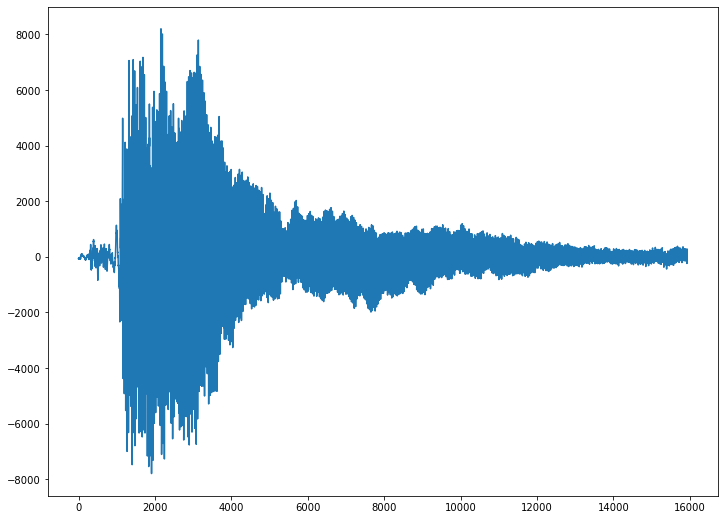

In [6]:
plt.plot(wave)

In [7]:
frequencies, time, spectrogram = signal.spectrogram(wave, frequency)
spectrogram.shape

(129, 70)

In [8]:
frequencies.shape

(129,)

In [9]:
time

array([0.008, 0.022, 0.036, 0.05 , 0.064, 0.078, 0.092, 0.106, 0.12 ,
       0.134, 0.148, 0.162, 0.176, 0.19 , 0.204, 0.218, 0.232, 0.246,
       0.26 , 0.274, 0.288, 0.302, 0.316, 0.33 , 0.344, 0.358, 0.372,
       0.386, 0.4  , 0.414, 0.428, 0.442, 0.456, 0.47 , 0.484, 0.498,
       0.512, 0.526, 0.54 , 0.554, 0.568, 0.582, 0.596, 0.61 , 0.624,
       0.638, 0.652, 0.666, 0.68 , 0.694, 0.708, 0.722, 0.736, 0.75 ,
       0.764, 0.778, 0.792, 0.806, 0.82 , 0.834, 0.848, 0.862, 0.876,
       0.89 , 0.904, 0.918, 0.932, 0.946, 0.96 , 0.974])

In [10]:
time.shape

(70,)

In [11]:
spectrogram

array([[1.0868652e-01, 9.1637101e-04, 6.5411944e+00, ..., 5.1960982e-02,
        4.4851068e-01, 1.4074307e-02],
       [1.6537783e+01, 4.4535835e+01, 1.8268069e+02, ..., 1.8440410e+00,
        1.2020613e+01, 4.4849653e+00],
       [2.2552063e+01, 1.7923335e+02, 1.2379675e+02, ..., 8.0963440e+00,
        8.0144966e-01, 1.8326589e+00],
       ...,
       [2.4090045e-04, 2.8945657e-03, 1.9330037e-03, ..., 7.7232852e-04,
        1.5163567e-04, 2.6058359e-03],
       [4.0906984e-03, 5.5308687e-03, 1.2940849e-03, ..., 2.1718841e-03,
        9.2378905e-04, 1.3194859e-02],
       [2.0868775e-04, 1.9898349e-03, 4.4409171e-04, ..., 2.9390457e-03,
        5.3355173e-04, 6.5338987e-05]], dtype=float32)

In [12]:
spectrogram.shape

(129, 70)

In [13]:
cmap=get_cmap("coolwarm")

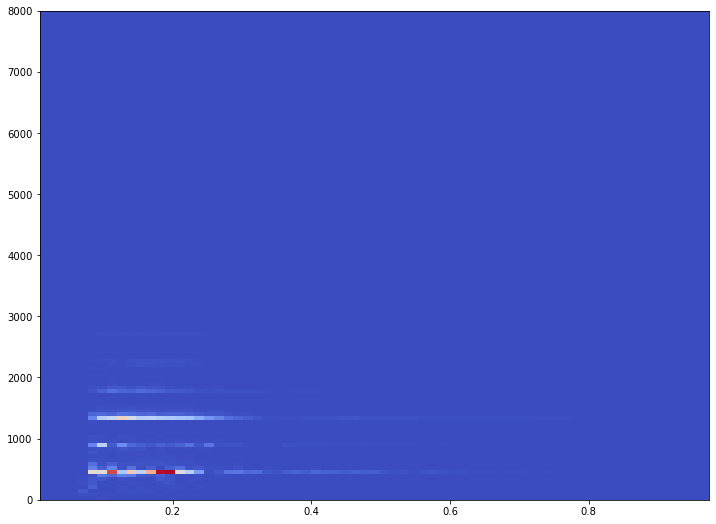

In [14]:
plt.pcolormesh(time, frequencies, spectrogram,cmap=cmap)

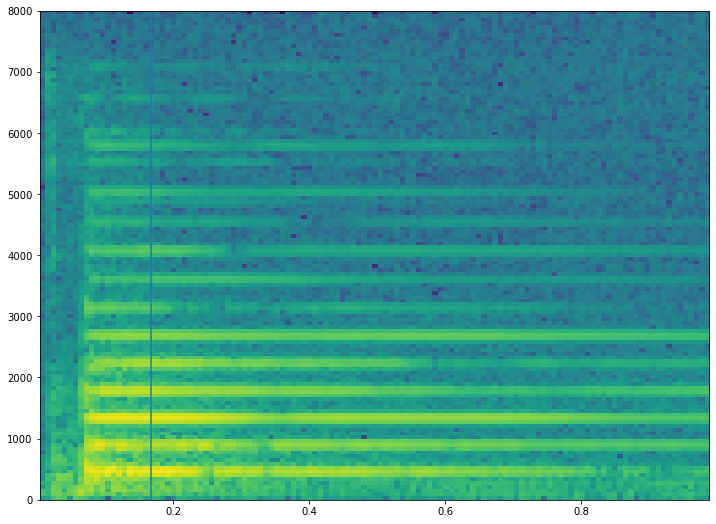

In [15]:
specgram, frequencies_specgram, time_specgram, im_specgram = plt.specgram(wave, Fs=frequency)
plt.axvline(time_specgram[20])

In [16]:
wave.shape

(15931,)

Text(0, 0.5, 'Frequency')

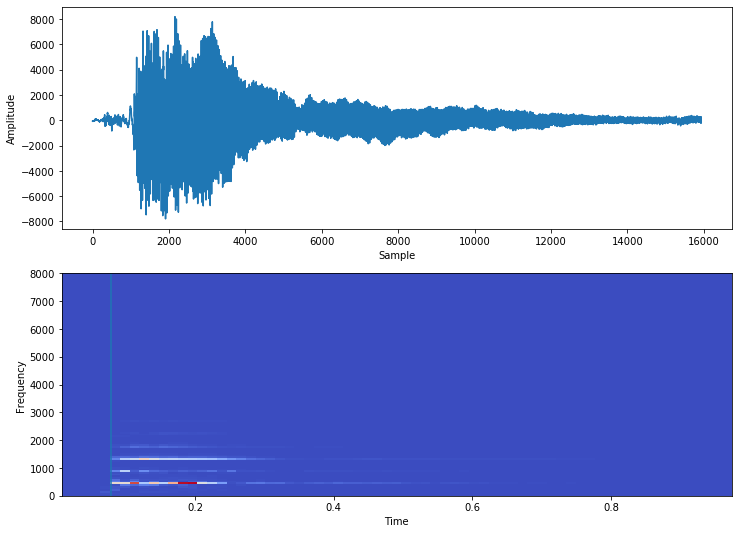

In [17]:
plt.subplot(211)
plt.plot(wave)
plt.xlabel('Sample')
plt.ylabel('Amplitude')

# Plot the spectrogram
plt.subplot(212)
plt.pcolormesh(time, frequencies, spectrogram, cmap=cmap)
plt.axvline(time[5])
plt.xlabel('Time')
plt.ylabel('Frequency')

In [18]:
local_maxs = signal.argrelextrema(spectrogram, np.greater, axis=1)
local_maxs

(array([  0,   0,   0, ..., 128, 128, 128]),
 array([ 2,  4,  6, ..., 62, 65, 67]))

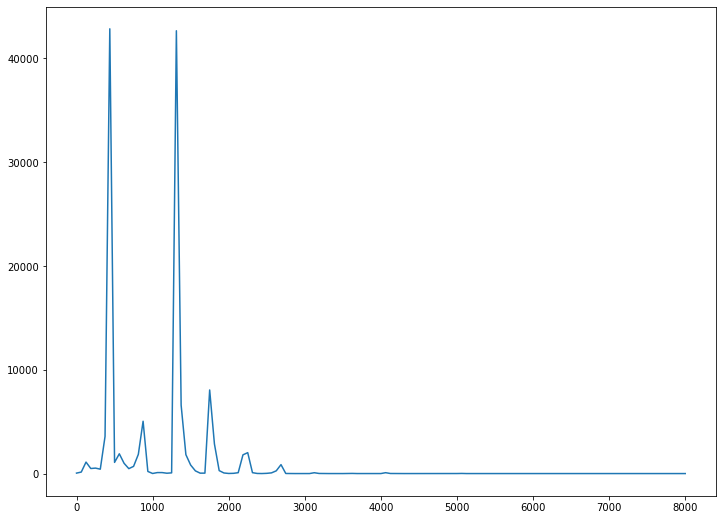

In [19]:
plt.plot(frequencies, spectrogram.T[10])

In [20]:
maxs_i = np.apply_along_axis(np.argmax, 0, spectrogram)
maxs_i.shape

(70,)

In [21]:
maxs_i

array([ 2,  2,  5,  1,  2,  7,  7,  7, 21,  7,  7,  7,  7,  7,  7,  7, 21,
       21, 21,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7, 21,  7, 21,  7,  7,  7, 21,  7, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 14, 21,
       21, 21])

In [22]:
frequencies[maxs_i]

array([ 125. ,  125. ,  312.5,   62.5,  125. ,  437.5,  437.5,  437.5,
       1312.5,  437.5,  437.5,  437.5,  437.5,  437.5,  437.5,  437.5,
       1312.5, 1312.5, 1312.5,  437.5,  437.5,  437.5,  437.5,  437.5,
        437.5,  437.5,  437.5,  437.5,  437.5,  437.5,  437.5,  437.5,
        437.5,  437.5,  437.5,  437.5, 1312.5,  437.5, 1312.5,  437.5,
        437.5,  437.5, 1312.5,  437.5, 1312.5, 1312.5, 1312.5, 1312.5,
       1312.5, 1312.5, 1312.5, 1312.5, 1312.5, 1312.5, 1312.5, 1312.5,
       1312.5, 1312.5, 1312.5, 1312.5, 1312.5, 1312.5, 1312.5, 1312.5,
       1312.5, 1312.5,  875. , 1312.5, 1312.5, 1312.5])

In [23]:
maxs = np.apply_along_axis(np.amax, 0, spectrogram)
maxs.shape

(70,)

In [24]:
maxs_i[maxs>10]

array([ 2,  2,  5,  1,  2,  7,  7,  7, 21,  7,  7,  7,  7,  7,  7,  7, 21,
       21, 21,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7, 21,  7, 21,  7,  7,  7, 21,  7, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 14, 21,
       21, 21])

In [25]:
maxs

array([2.2552063e+01, 1.7923335e+02, 3.4267392e+02, 1.2934995e+02,
       3.2019702e+03, 5.9909164e+04, 5.9215559e+04, 1.0175523e+05,
       6.4005621e+04, 6.8372266e+04, 4.2856727e+04, 7.8063859e+04,
       1.1075249e+05, 1.1174152e+05, 5.4679691e+04, 4.1792273e+04,
       2.6770871e+04, 1.9311676e+04, 1.4597837e+04, 1.0407159e+04,
       1.0980320e+04, 7.6893677e+03, 8.2506260e+03, 3.0723591e+03,
       1.9086865e+03, 4.3159141e+03, 5.5021211e+03, 4.2161763e+03,
       6.9817812e+03, 5.1297876e+03, 4.9931069e+03, 4.3639106e+03,
       4.9211655e+03, 4.0897644e+03, 4.5047959e+03, 2.2804570e+03,
       1.6424153e+03, 1.7638163e+03, 1.3288700e+03, 1.8026254e+03,
       2.6057834e+03, 2.0919163e+03, 1.1703618e+03, 1.3832990e+03,
       1.0908064e+03, 1.1542738e+03, 1.1439222e+03, 1.0409119e+03,
       9.6788153e+02, 9.6020923e+02, 9.1456061e+02, 8.1374194e+02,
       6.6722974e+02, 5.2670190e+02, 4.5022217e+02, 3.5786447e+02,
       2.6295712e+02, 2.1506274e+02, 1.7235713e+02, 1.4748198e

In [26]:
hpf_maxs_i = (maxs>10).astype(np.int) * maxs_i
hpf_maxs_i

array([ 2,  2,  5,  1,  2,  7,  7,  7, 21,  7,  7,  7,  7,  7,  7,  7, 21,
       21, 21,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7, 21,  7, 21,  7,  7,  7, 21,  7, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 14, 21,
       21, 21])

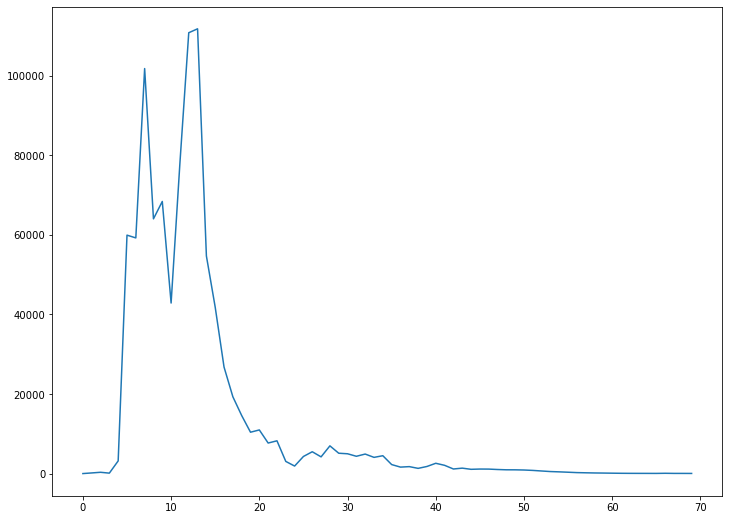

In [27]:
plt.plot(maxs)

Text(0, 0.5, 'Frequency')

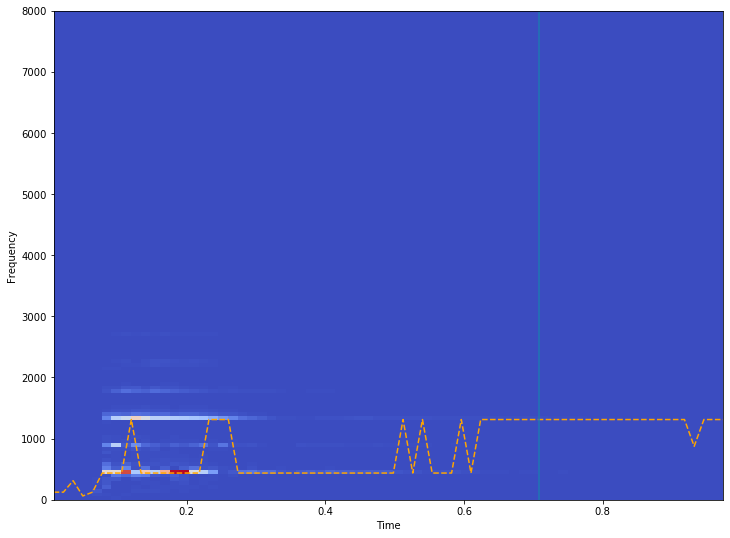

In [28]:
plt.pcolormesh(time, frequencies, spectrogram, cmap=cmap)
plt.plot(time,frequencies[maxs_i],"--",color="orange")
plt.axvline(time[50])
plt.xlabel('Time')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

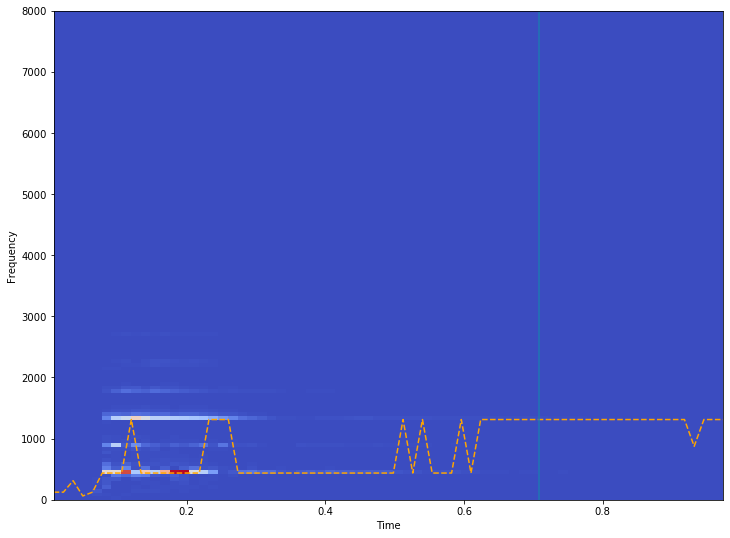

In [29]:
plt.pcolormesh(time, frequencies, spectrogram, cmap=cmap)
plt.plot(time,frequencies[hpf_maxs_i],"--",color="orange")
plt.axvline(time[50])
plt.xlabel('Time')
plt.ylabel('Frequency')

In [30]:
signal.argrelextrema(spectrogram.T[50], np.greater)

(array([  1,   5,   7,  10,  14,  17,  21,  28,  36,  43,  47,  50,  54,
         58,  60,  63,  65,  70,  73,  81,  86,  89,  93,  98, 102, 106,
        108, 110, 113, 115, 119, 121, 123, 127]),)

In [31]:
signal.find_peaks(spectrogram.T[50])

(array([  1,   5,   7,  10,  14,  17,  21,  28,  36,  43,  47,  50,  54,
         58,  60,  63,  65,  70,  73,  81,  86,  89,  93,  98, 102, 106,
        108, 110, 113, 115, 119, 121, 123, 127]), {})

In [32]:
specgram.shape

(129, 123)

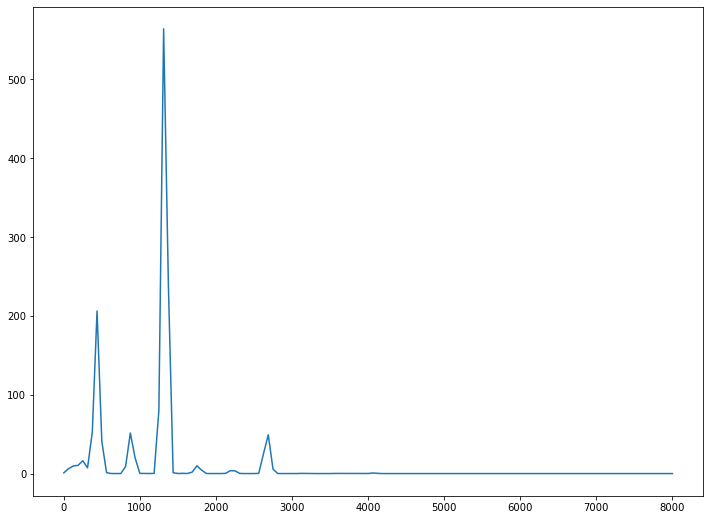

In [33]:
plt.plot(frequencies_specgram, specgram.T[90])

In [34]:
signal.argrelextrema(specgram.T[50], np.greater)

(array([  1,   7,  14,  17,  21,  28,  35,  39,  43,  50,  54,  58,  61,
         65,  71,  75,  81,  88,  93,  99, 105, 113, 117, 121, 126]),)